In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("C:\\Users\\mohda\\Desktop\\Programming Assignment -2\\stock_data.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Preprocess the data
data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters
data['Text'] = data['Text'].str.lower()  # Convert to lowercase

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1-score:", f1_score(y_test, lr_pred))
print()

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))
print()

# Support Vector Machines
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)
svm_pred = svm_model.predict(X_test_vec)
print("Support Vector Machines:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1-score:", f1_score(y_test, svm_pred))

C:\Users\mohda\AppData\Local\Temp\ipykernel_23344\1546981619.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters


Logistic Regression:
Accuracy: 0.7937877480586712
Precision: 0.8132147395171537
Recall: 0.8743169398907104
F1-score: 0.8426596445029625

Naive Bayes:
Accuracy: 0.7782571182053495
Precision: 0.7851140456182473
Recall: 0.8934426229508197
F1-score: 0.8357827476038339

Support Vector Machines:
Accuracy: 0.7877480586712683
Precision: 0.8319672131147541
Recall: 0.8319672131147541
F1-score: 0.8319672131147541


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv("C:\\Users\\mohda\\Desktop\\Programming Assignment -2\\stock_data.csv")

# Preprocess the data
data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters
data['Text'] = data['Text'].str.lower()  # Convert to lowercase

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)

# Evaluate the model
print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1-score:", f1_score(y_test, nb_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_pred))




Multinomial Naive Bayes:
Accuracy: 0.7782571182053495
Precision: 0.7851140456182473
Recall: 0.8934426229508197
F1-score: 0.8357827476038339

Classification Report:
              precision    recall  f1-score   support

          -1       0.76      0.58      0.66       427
           1       0.79      0.89      0.84       732

    accuracy                           0.78      1159
   macro avg       0.77      0.74      0.75      1159
weighted avg       0.78      0.78      0.77      1159


Confusion Matrix:
[[248 179]
 [ 78 654]]


C:\Users\mohda\AppData\Local\Temp\ipykernel_23344\229032056.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters


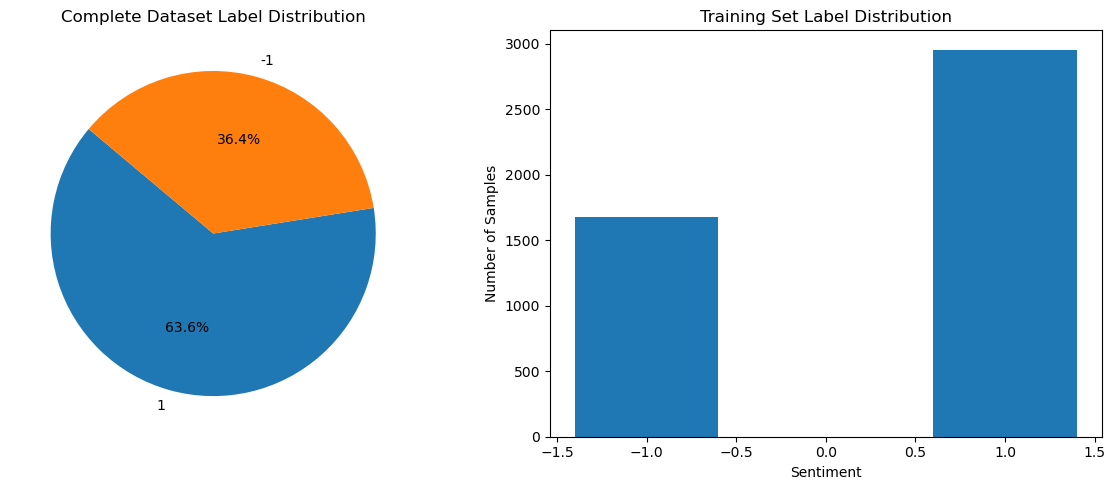

In [12]:
import matplotlib.pyplot as plt

# Label distribution in the complete dataset
label_counts = data['Sentiment'].value_counts()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Complete Dataset Label Distribution')




# Label distribution in the training set
train_label_counts = y_train.value_counts()
plt.subplot(1, 2, 2)
plt.bar(train_label_counts.index, train_label_counts.values)
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()

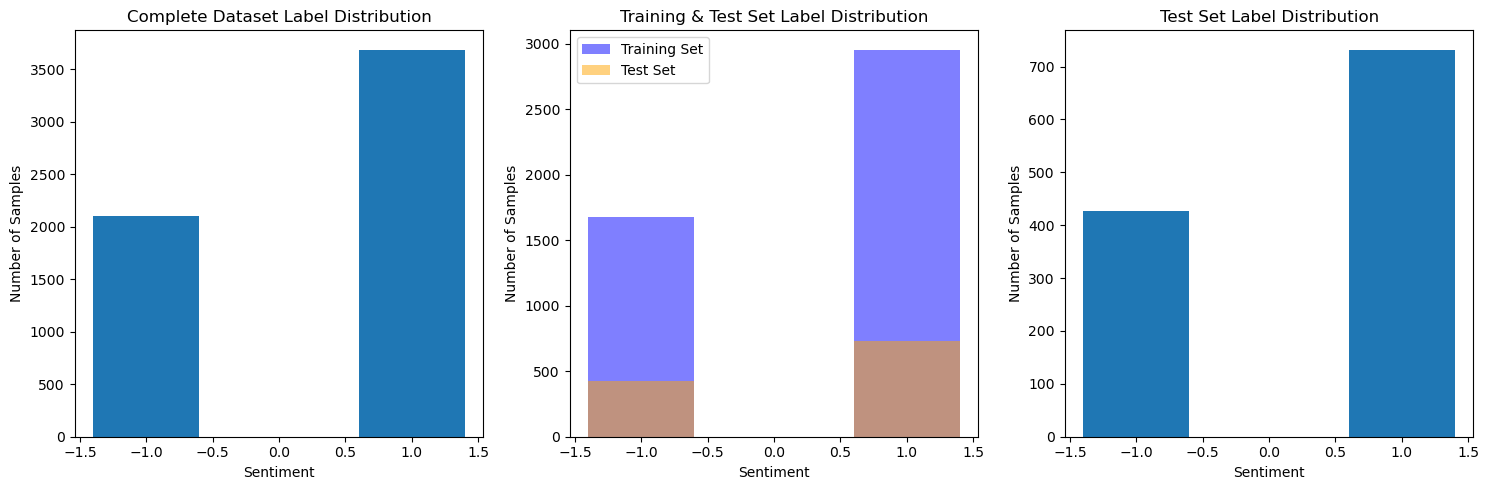

In [13]:
import matplotlib.pyplot as plt

# Complete dataset label distribution
complete_label_counts = data['Sentiment'].value_counts()
complete_label_percentages = complete_label_counts / len(data) * 100

# Training set label distribution
train_label_counts = y_train.value_counts()
train_label_percentages = train_label_counts / len(y_train) * 100

# Test set label distribution
test_label_counts = y_test.value_counts()
test_label_percentages = test_label_counts / len(y_test) * 100

# Plotting
plt.figure(figsize=(15, 5))

# Complete dataset label breakdown chart
plt.subplot(1, 3, 1)
plt.bar(complete_label_counts.index, complete_label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Complete Dataset Label Distribution')

# Training set label breakdown plot
plt.subplot(1, 3, 2)
plt.bar(train_label_counts.index, train_label_counts.values, color='blue', alpha=0.5, label='Training Set')
plt.bar(test_label_counts.index, test_label_counts.values, color='orange', alpha=0.5, label='Test Set')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Training & Test Set Label Distribution')
plt.legend()

# Test set label breakdown plot
plt.subplot(1, 3, 3)
plt.bar(test_label_counts.index, test_label_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.title('Test Set Label Distribution')

plt.tight_layout()
plt.show()

C:\Users\mohda\AppData\Local\Temp\ipykernel_23344\1481777542.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters


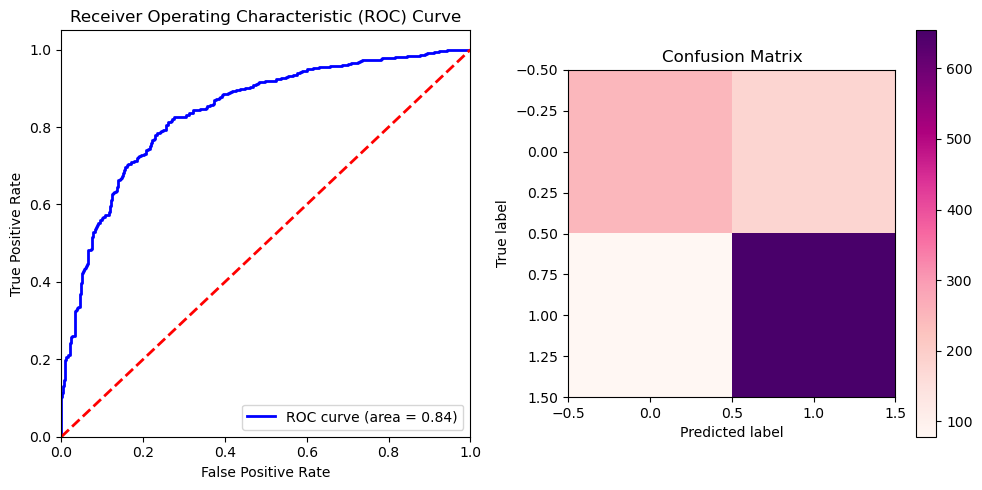

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\mohda\\Desktop\\Programming Assignment -2\\stock_data.csv")

# Preprocess the data
data['Text'] = data['Text'].str.replace('[^\w\s]', '')  # Remove special characters
data['Text'] = data['Text'].str.lower()  # Convert to lowercase

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Feature extraction using Bag-of-Words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred = nb_model.predict(X_test_vec)


# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# ROC curve
y_probs = nb_model.predict_proba(X_test_vec)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(10, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Confusion Matrix with changed color
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.RdPu)  # Change the colormap to RdPu
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [19]:
pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


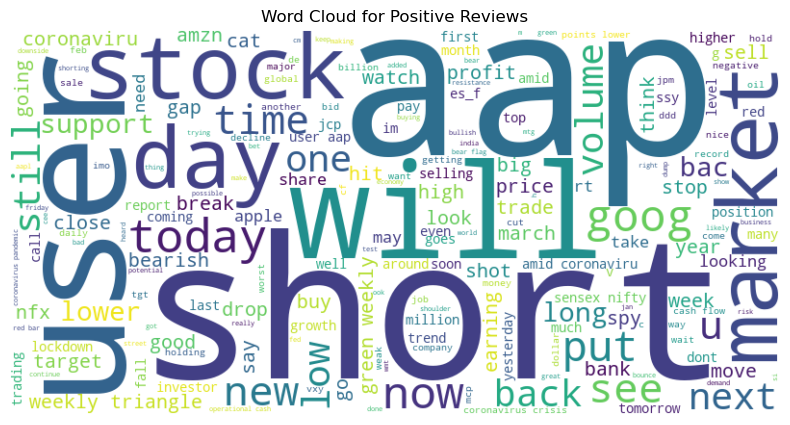

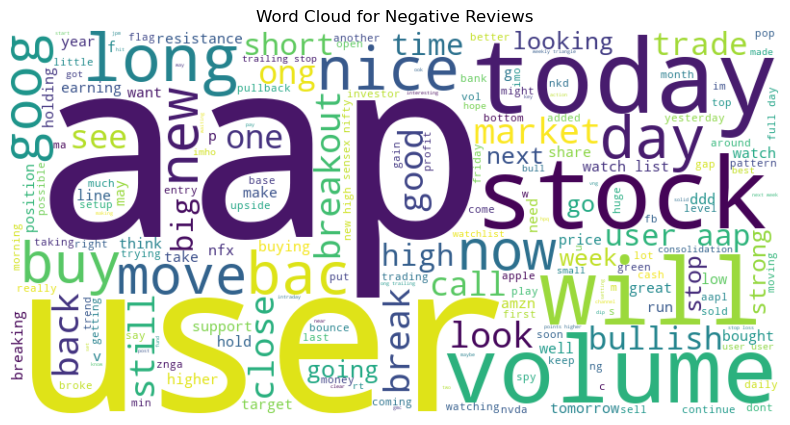

In [21]:
from wordcloud import WordCloud

# Filter positive and negative reviews based on ratings
positive_reviews = data[data['Sentiment'] == -1]['Text'].str.cat(sep=' ')
negative_reviews = data[data['Sentiment'] == 1]['Text'].str.cat(sep=' ')

# Positive Word Cloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Negative Word Cloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()